1 Метод k ближайших соседей

In [71]:
from matplotlib.colors import ListedColormap
from sklearn import datasets

%pylab inline

Populating the interactive namespace from numpy and matplotlib


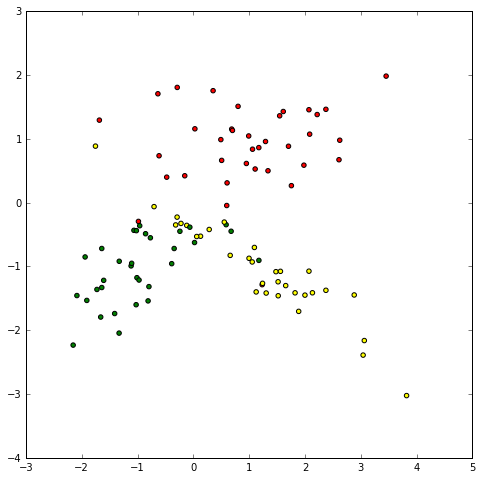

In [72]:
points = datasets.make_classification(n_samples = 100, n_features = 2, n_informative = 2, n_classes = 3, n_redundant = 0, 
                                    n_clusters_per_class = 1, random_state = 3)
colors = ListedColormap(['red', 'yellow', 'green'])
pyplot.figure(figsize(8, 8))
pyplot.scatter(map(lambda x: x[0], points[0]), map(lambda x: x[1], points[0]), c = points[1], cmap = colors)

In [73]:
from sklearn import cross_validation, metrics, neighbors
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(points[0], points[1], test_size = 0.2, random_state = 1)

In [74]:
def get_meshgrid(data, step = .05, border = .5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [75]:
light_colors = ListedColormap(['lightcoral', 'lightyellow', 'lightgreen'])
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    estimator.fit(train_data, train_labels)
    pyplot.figure(figsize(16, 6))
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

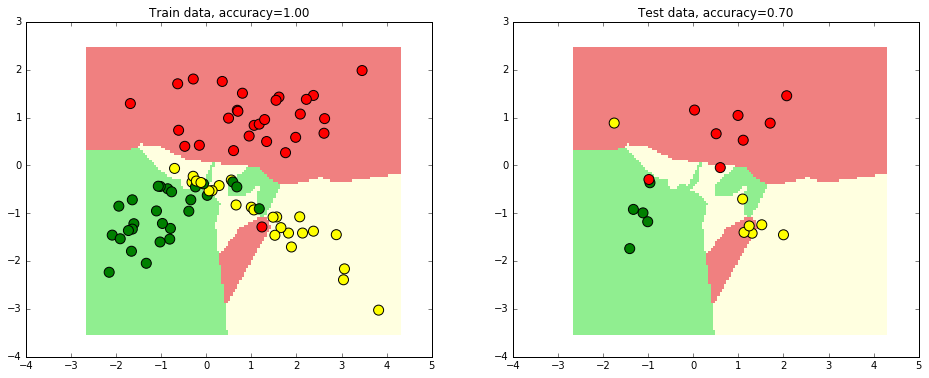

In [76]:
estimator = neighbors.KNeighborsClassifier(n_neighbors = 1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

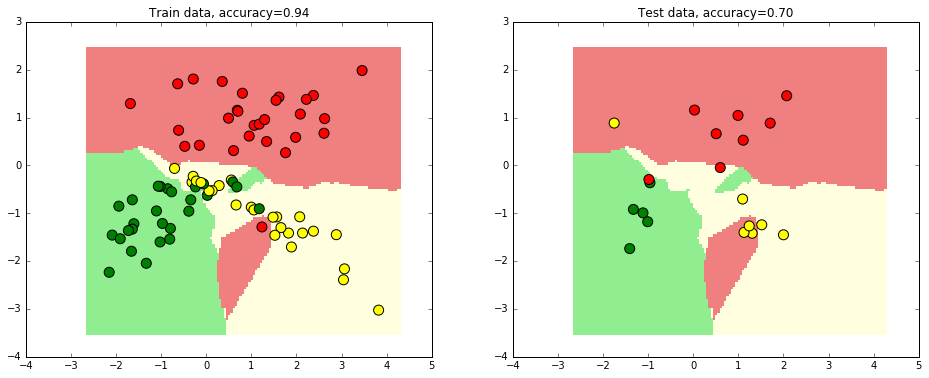

In [77]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

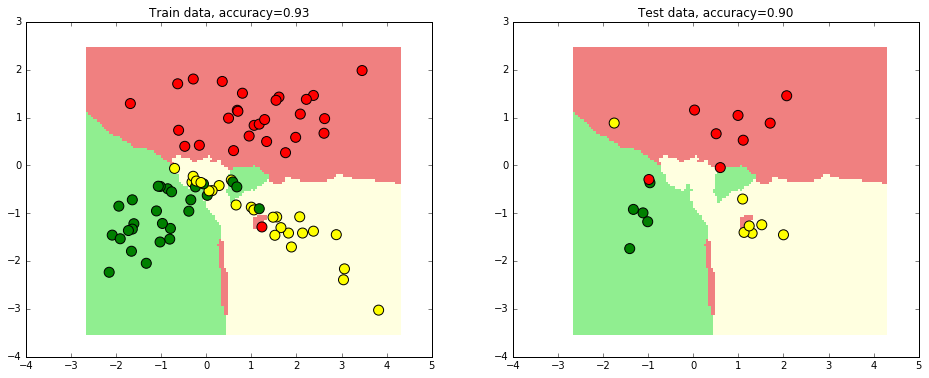

In [78]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

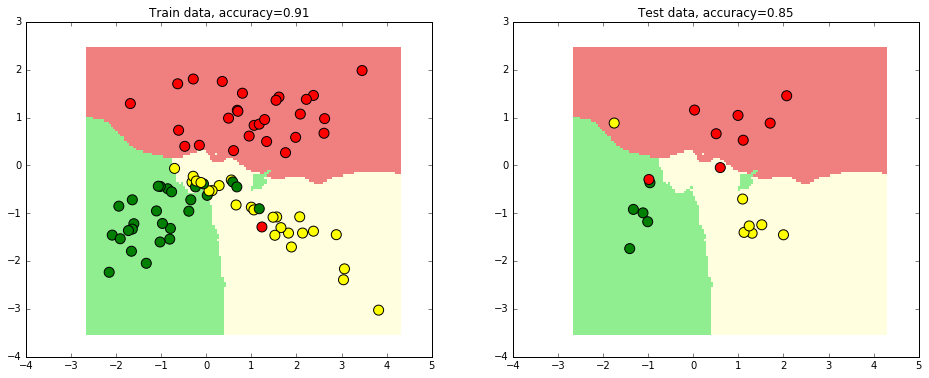

In [79]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=5)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

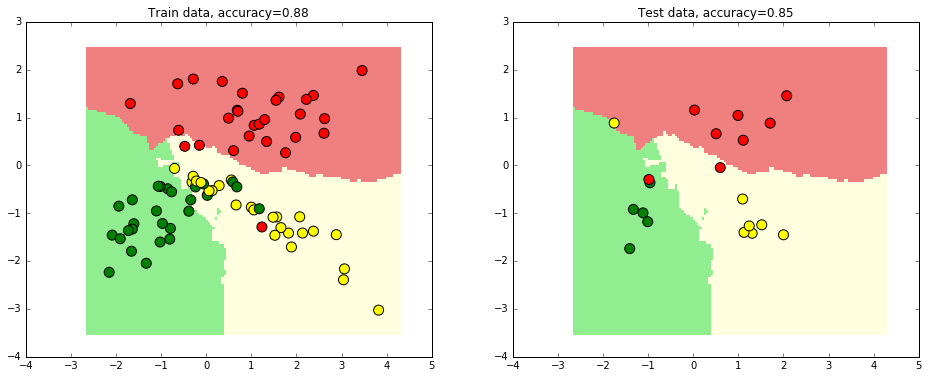

In [80]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

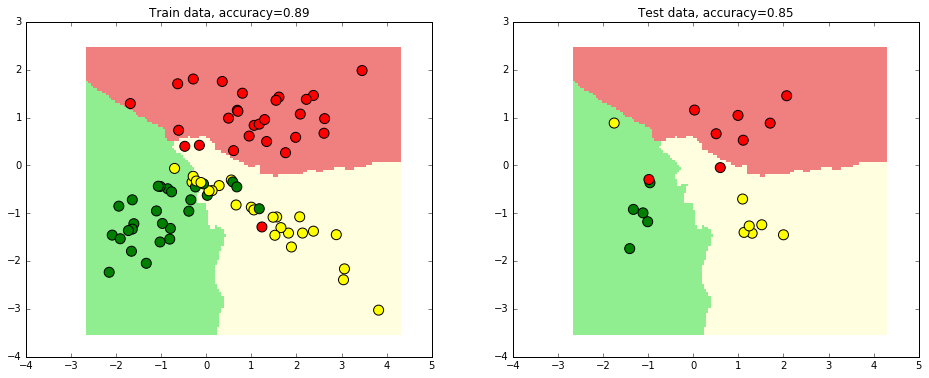

In [81]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=20)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

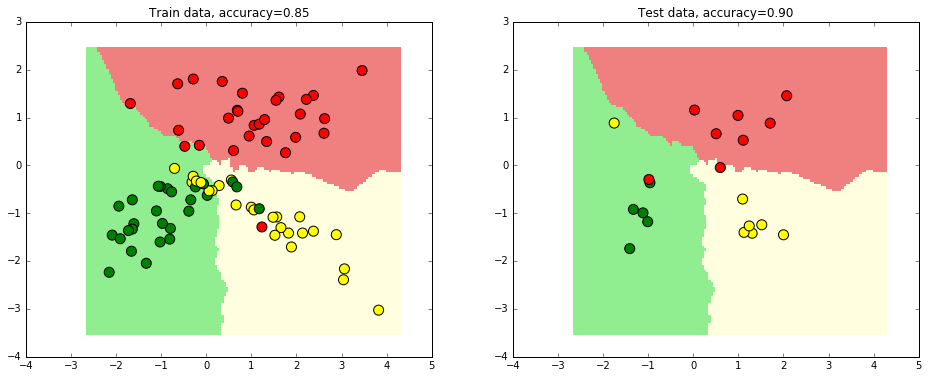

In [82]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=30)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

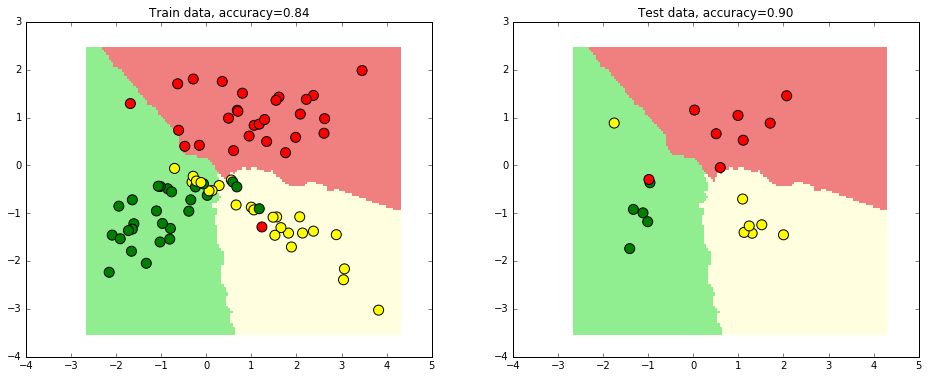

In [83]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=40)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

In [92]:
def accuracy(estimator, train_data, train_labels, test_data, test_labels, colors = colors, light_colors = light_colors):
    estimator.fit(train_data, train_labels)
    return metrics.accuracy_score(test_labels, estimator.predict(test_data))
    
data_accuracy = []
kf = KFold(5)
for i in range(1, 10):
    net_accuracy = 0
    estimator = neighbors.KNeighborsClassifier(n_neighbors = i)
    for train_indices, test_indices in kf.split([j for j in range(0, 100)]):
        net_accuracy += accuracy(estimator, [points[0][i] for i in train_indices], [points[1][i] for i in train_indices], [points[0][i] for i in test_indices], [points[1][i] for i in test_indices]) / 5
    data_accuracy.append(net_accuracy)

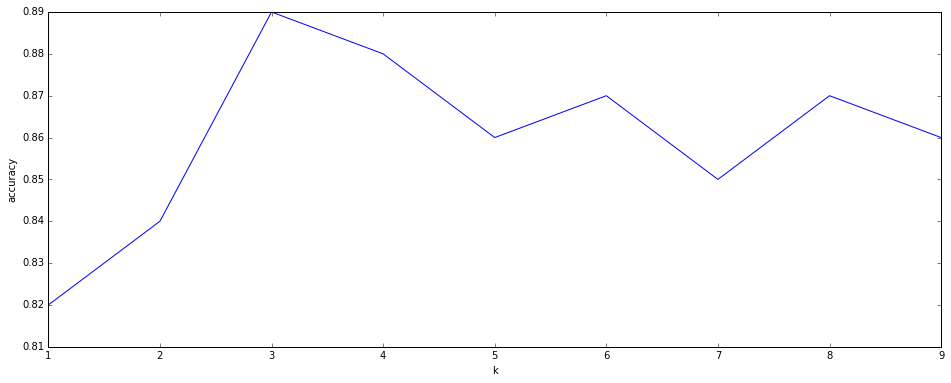

In [103]:
data_k = range(1, 10)
pyplot.ylabel('accuracy')
pyplot.xlabel('k')
pyplot.plot(data_k, data_accuracy)

По графику определяем оптимальное значение количества соседей k, которое равно 3.